In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from autorocks.viz import plots_setup
import torch
import gpytorch
import botorch.posteriors
from botorch import models
from botorch.optim import fit
import torch
import numpy as np
import pandas as pd
import botorch

output_location = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/Background/Figures/"
plt.style.use("ggplot")
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("paper")  # , font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"
plt.rc("text", usetex=False)
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="large")
plt.rc("pdf", use14corefonts=True)



In [3]:

problem = botorch.test_functions.multi_objective.BraninCurrin()

In [106]:
x_branin, x_currin= torch.meshgrid(torch.linspace(0, 1), torch.linspace(0, 1))
with torch.no_grad():
    y_branin, y_currin = problem(x_branin), problem(x_currin)

    random =  problem(botorch.utils.draw_sobol_samples(bounds=problem.bounds, n=1000, q=1).squeeze(1))
    x_branin = torch.concat([y_branin[:, 0], y_currin[:, 0], random[:, 0]])
    x_currin = torch.concat([y_branin[:,1], y_currin[:, 1], random[:, 1]])
    x_all = torch.vstack([x_branin, x_currin]).T


In [107]:
# pred = {"Branin": torch.concat([y_branin[:, 0], y_currin[:, 0], random[:, 0]]),
#          "Currin": torch.concat([y_branin[:,1], y_currin[:, 1], random[:, 1]])}
pred = {"Branin": x_all[:, 0],
         "Currin": x_all[:, 1]}

df = pd.DataFrame.from_dict(pred)

In [108]:
import botorch.utils.multi_objective

non_dominated = botorch.utils.multi_objective.is_non_dominated(x_all)

<AxesSubplot: xlabel='Currin', ylabel='Branin'>

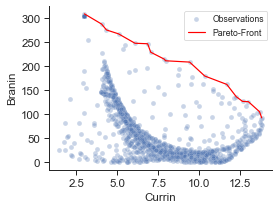

In [109]:

f, ax = plt.subplots(1, 1, figsize=(4, 3))

ax = sns.scatterplot(df, x="Currin", y="Branin", alpha=0.3, s=24, label="Observations", ax=ax)
sns.lineplot(
    x= x_all[non_dominated][:, 1],
    y=x_all[non_dominated][:, 0],
    label = "Pareto-Front",
    color = "red",
    ax=ax)


In [111]:
output_format = "pdf"
f.savefig(f"{output_location}/pareto_front.{output_format}", bbox_inches="tight", format=f"{output_format}", dpi=300)


findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family ['Arial'] not found. Falling back to Helvetica.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
